ERIA SYALWA

23.11.5535

IF 03

In [2]:
# --- 1. IMPORT LIBRARIES ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib # Untuk simpan model (Poin 6.b)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# --- 2. PROFILE DATASET (Poin 2) ---
import kagglehub

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)
print("Informasi Dataset:")
print(df.info())
print("\nStatistik Deskriptif:\n", df.describe())

Using Colab cache for faster access to the 'telco-customer-churn' dataset.
Path to dataset files: /kaggle/input/telco-customer-churn
Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null

In [3]:
# --- 3. DATA PREPROCESSING (Poin 3) ---
# Mengonversi TotalCharges ke numerik & hapus missing values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)

# Drop ID karena tidak berguna untuk modeling
df.drop('customerID', axis=1, inplace=True)

# Encoding variabel kategorikal
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

/tmp/ipython-input-2955615152.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='viridis')


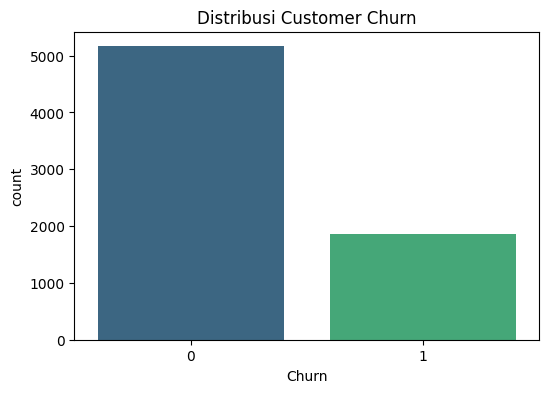

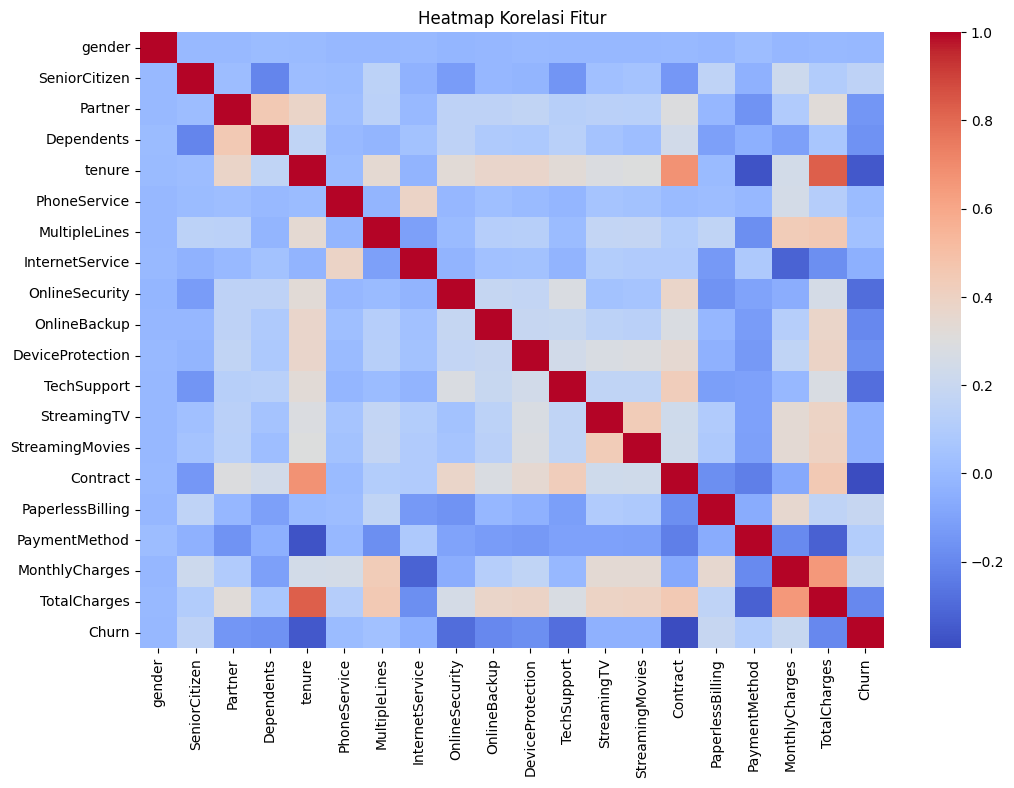

In [4]:
# --- 4. EXPLORATORY DATA ANALYSIS / EDA (Poin 4) ---
# Visualisasi Distribusi Target (Churn vs No Churn)
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df, palette='viridis')
plt.title('Distribusi Customer Churn')
plt.show()

# Korelasi antar fitur
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Heatmap Korelasi Fitur')
plt.show()

In [5]:
# --- 5. SELEKSI FITUR (Poin 5) ---
X = df.drop('Churn', axis=1)
y = df['Churn']

# Menggunakan SelectKBest untuk mencari 10 fitur terbaik (Metode Filter)
selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X, y)
cols = selector.get_support(indices=True)
features_df = X.iloc[:,cols]

print("\n10 Fitur Terpilih:\n", features_df.columns.tolist())


10 Fitur Terpilih:
 ['Dependents', 'tenure', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges']


In [6]:
# --- 6. MODELING (Poin 6) ---
X_train, X_test, y_train, y_test = train_test_split(features_df, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# SIMPAN MODEL (Poin 6.b)
joblib.dump(model, 'model_churn_rf.pkl')
print("\nModel telah disimpan sebagai 'model_churn_rf.pkl'")


Model telah disimpan sebagai 'model_churn_rf.pkl'


In [7]:
# --- 7. EVALUASI MODEL (Poin 7) ---
y_pred = model.predict(X_test)
print("\nAkurasi Model:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Akurasi Model: 0.7889125799573561

Confusion Matrix:
 [[932 101]
 [196 178]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.48      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.78      0.79      0.78      1407

